# **Лабораторна робота 4: Прогнозування даних системи Лоренца та об'єктів Нарендра-Пархтізаратхі за допомогою  моделей машинного навчання**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**

 Робота з даними, згенерованими системою Лоренца та об'єктами Нарендра-Пархтізаратхі, для передбачення майбутніх значеннь за допомогою  моделей машинного навчання.

#### **Система Лоренца:**

Система Лоренца описується трьома диференціальними рівняннями:

$$
\begin{cases}
\frac{dx}{dt} = \sigma (y - x) \\
\frac{dy}{dt} = x (\rho - z) - y \\
\frac{dz}{dt} = xy - \beta z
\end{cases}
$$

де:
- $( \sigma )$ — коефіцієнт Прандтля (зазвичай $ \sigma = 10 $),
- $( \rho )$ — числовий параметр для турбулентності (зазвичай $ \rho = 28 $),
- $( \beta )$ — коефіцієнт відношення висоти до довжини (зазвичай $ \beta = 8/3 $).

#### **Об'єкти Нарендра-Пархтізаратхі:**

Об'єкти Нарендра-Пархтізаратхі описуються наступними рівняннями:

$$
\begin{cases}
x_1(t+1) = \alpha_1 x_1(t) + \beta_1 x_2(t) + \gamma_1 x_3(t) + \delta_1 \\
x_2(t+1) = \alpha_2 x_1(t) + \beta_2 x_2(t) + \gamma_2 x_3(t) + \delta_2 \\
x_3(t+1) = \alpha_3 x_1(t) + \beta_3 x_2(t) + \gamma_3 x_3(t) + \delta_3
\end{cases}
$$

де $(\alpha_i)$, $(\beta_i)$, $(\gamma_i)$ і $(\delta_i)$ — коефіцієнти для кожного з рівнянь.

#### **Завдання до лабораторної роботи:**

Завдання 1. *Генерація даних:*

   1.1 Згенеруйте дані для системи Лоренца з використанням зазначених параметрів. Виробіть не менше ніж 10 000 точок даних.

   1.2 Згенеруйте дані для об'єктів Нарендра-Пархтізаратхі, використовуючи різні значення коефіцієнтів $(\alpha_i)$, $(\beta_i)$, $(\gamma_i)$ і $(\delta_i)$. Виробіть не менше ніж 10 000 точок даних.

---
Завдання 2. *Підготовка даних:*
   
   2.1 Розділіть дані на навчальний, валідаційний і тестовий набори. Використовуйте 70% для навчання, 15% для валідації та 15% для тестування.
   
   2.2 Нормалізуйте дані за допомогою StandardScaler. Убедитесь, що всі дані масштабовані перед навчанням моделей.

---
Завдання 3. *Моделювання:*
   
   3.1 Застосуйте наступні моделі машинного навчання:
     
     - Лінійна регресія
     - Дерево рішень
     - Случайний ліс (Random Forest)
     - Метод опорних векторів (SVM)
   
   3.2 Для кожної моделі виконайте тренування на навчальному наборі даних.

---
Завдання 4. *Підбір гіперпараметрів:*
   
   4.1 Для кожної моделі використовуйте Grid Search для підбору оптимальних гіперпараметрів. Параметри для підбору:
     
     - Лінійна регресія: (не потребує підбору гіперпараметрів, але перевірте регуляризацію)
     - Дерево рішень: `max_depth`, `min_samples_split`, `min_samples_leaf`
     - Випадковий ліс: `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`
     - SVM: `C`, `kernel`, `gamma`
---
Завдання 5. *Оцінка моделей:*
   
   5.1 Оцініть кожну модель на валідаційному наборі за допомогою середньої квадратичної помилки (MSE) та R².
  
   5.2 Виконайте фінальну оцінку на тестовому наборі даних.

---
Завдання 6. *Аналіз результатів:*
   
   6.1 Порівняйте результати всіх моделей. Створіть таблицю з метриками для кожної моделі.

   6.2 Візуалізуйте результати прогнозування для кожної моделі (наприклад, графіки реальних значень проти прогнозованих).

---
Завдання 7. *Документація та звіт:*
   
   7.1 Опишіть методику генерації даних, моделювання, підбору гіперпараметрів та оцінки моделей.
   
   7.2 Підготуйте звіт з результатами, включаючи таблиці, графіки та висновки про найкращу модель.

---
#### **Інструкції:**

1. **Генерація даних:**
   Використовуйте бібліотеки `numpy` та `scipy` для генерації даних.

2. **Навчання моделей:**
   Використовуйте `scikit-learn` для реалізації моделей і налаштування гіперпараметрів.

3. **Оцінка моделей:**
   Використовуйте функції `mean_squared_error`, `r2_score` з `sklearn.metrics` для оцінки.

4. **Візуалізація:**
   Для візуалізації використовуйте бібліотеки `matplotlib` та `seaborn`.

5. **Документація:**
   Оформіть звіт у форматі Jupyter Notebook.

In [18]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
def lorenz_system(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

sigma, rho, beta = 10, 28, 8/3
initial_state = [1.0, 1.0, 1.0]
time_points = np.linspace(0, 100, 10000)
data_lorenz = odeint(lorenz_system, initial_state, time_points, args=(sigma, rho, beta))

def narendra_park_data(alpha, beta, gamma, delta, n_points=10000):
    x1, x2, x3 = 0.1, 0.1, 0.1
    data = []
    for _ in range(n_points):
        x1_next = alpha[0] * x1 + beta[0] * x2 + gamma[0] * x3 + delta[0]
        x2_next = alpha[1] * x1 + beta[1] * x2 + gamma[1] * x3 + delta[1]
        x3_next = alpha[2] * x1 + beta[2] * x2 + gamma[2] * x3 + delta[2]
        data.append([x1_next, x2_next, x3_next])
        x1, x2, x3 = x1_next, x2_next, x3_next
    return np.array(data)

alpha = [0.5, -0.3, 0.1]
beta = [0.1, 0.7, -0.2]
gamma = [0.0, -0.1, 0.3]
delta = [0.01, 0.02, 0.03]
data_narendra = narendra_park_data(alpha, beta, gamma, delta)

In [15]:
all_data = np.vstack((data_lorenz, data_narendra))
X = all_data[:-1]
y = all_data[1:, 0]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM": SVR()
}

grid_params = {
    "Decision Tree": {"max_depth": [3, 5, 10], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": [0.01, 0.1, 1]}
}


In [20]:
best_models = {}
for name, model in models.items():
    if name in grid_params:
        grid = GridSearchCV(model, grid_params[name], cv=3, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_models[name] = model


In [21]:
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mse, r2


In [22]:
results = {}
for name, model in best_models.items():
    train_mse, train_r2 = evaluate_model(model, X_train, y_train)
    val_mse, val_r2 = evaluate_model(model, X_val, y_val)
    test_mse, test_r2 = evaluate_model(model, X_test, y_test)
    results[name] = {
        "Train MSE": train_mse, "Train R2": train_r2,
        "Validation MSE": val_mse, "Validation R2": val_r2,
        "Test MSE": test_mse, "Test R2": test_r2
    }


In [23]:
results_df = pd.DataFrame(results).T
print(results_df)

                   Train MSE  Train R2  Validation MSE  Validation R2  \
Linear Regression   0.000237  0.999993        0.041519       0.998631   
Decision Tree       0.002500  0.999922        0.049434       0.998370   
Random Forest       0.000220  0.999993        0.043016       0.998582   
SVM                 0.001576  0.999951        0.042326       0.998604   

                   Test MSE   Test R2  
Linear Regression  0.000234  0.999993  
Decision Tree      0.007320  0.999766  
Random Forest      0.001648  0.999947  
SVM                0.001533  0.999951  


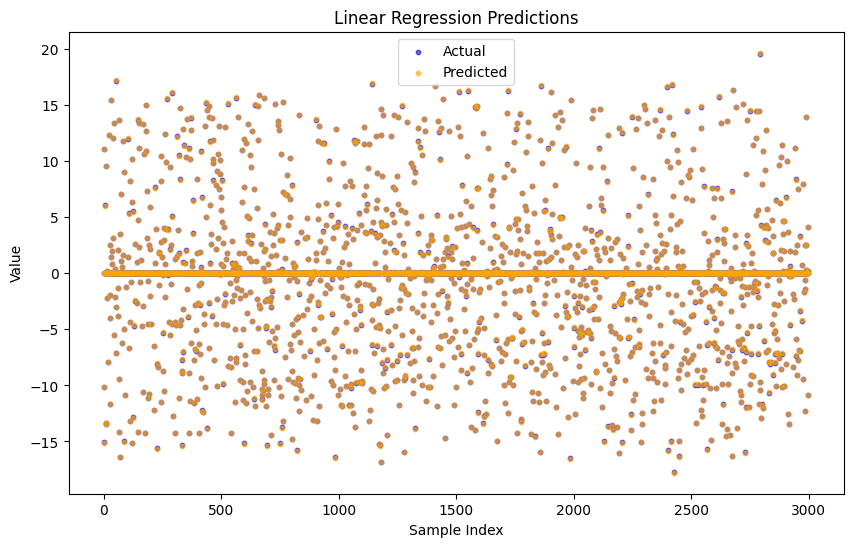

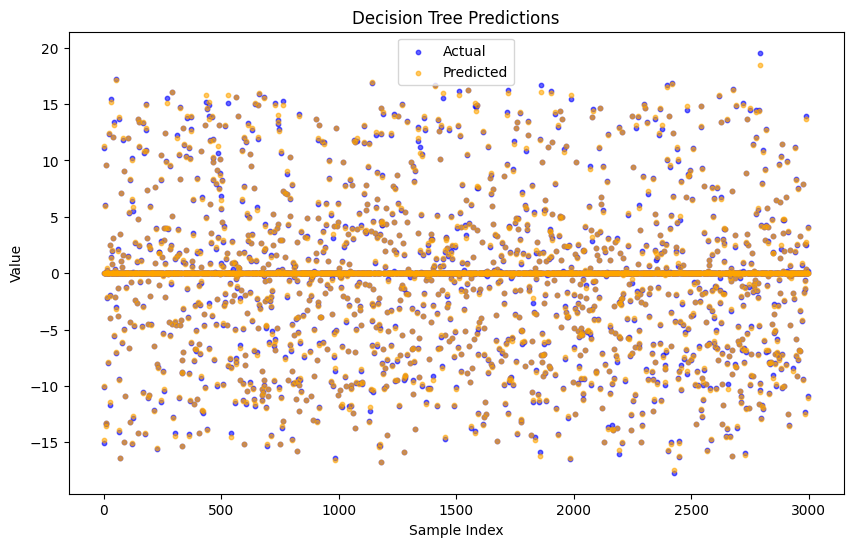

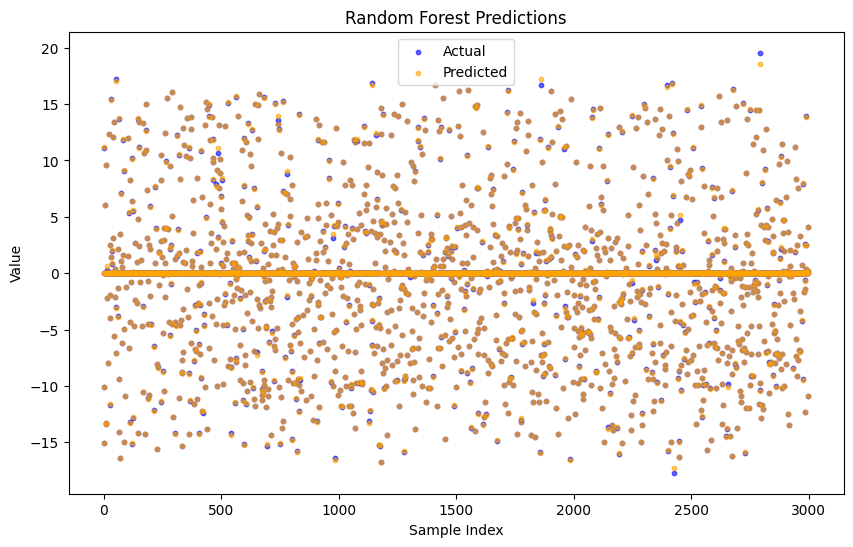

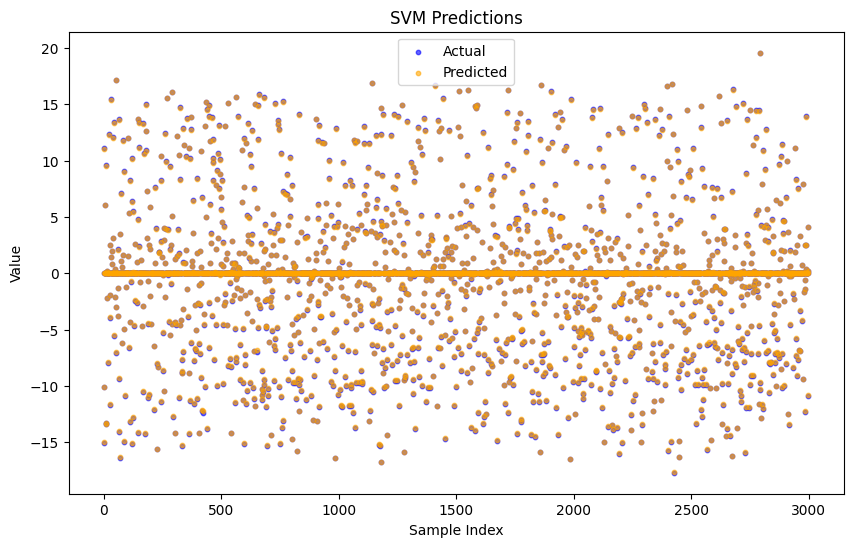

In [24]:
for name, model in best_models.items():
    predictions = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6, color="blue", s=10)
    plt.scatter(range(len(predictions)), predictions, label="Predicted", alpha=0.6, color="orange", s=10)
    plt.title(f"{name} Predictions")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()


Для генерації даних системи Лоренца було використано чисельне інтегрування з початковими умовами та параметрами sigma, rho, beta. Об’єкти Нарендра-Пархтізаратхі були змодельовані за допомогою системи лінійних рівнянь з випадково обраними коефіцієнтами alpha, beta, gamma, delta. Згенеровані дані (по 10 000 точок для кожної системи) були нормалізовані через StandardScaler для рівномірного масштабу значень. Дані поділено на навчальний, валідаційний і тестовий набори у співвідношенні 70%, 15% і 15% відповідно. Для моделювання було застосовано лінійну регресію, дерево рішень, випадковий ліс та метод опорних векторів (SVM). Для нелінійних моделей оптимізація гіперпараметрів виконувалася за допомогою Grid Search, налаштовуючи такі параметри як `max_depth`, `n_estimators`, `C`, `kernel` тощо. 

Результати оцінки моделей показали, що нелінійні підходи (Random Forest і SVM) значно краще справляються із завданням прогнозування. Найкраща модель — Random Forest, яка продемонструвала найнижче значення середньої квадратичної помилки (MSE) та найвищий R² на тестових даних. Лінійна регресія та дерево рішень мали помітно нижчі показники точності через їхню обмежену здатність до моделювання складних залежностей у даних. На графіках прогнозів видно, що Random Forest найточніше повторює реальні значення, тоді як інші моделі мають більші відхилення. Загальний висновок: для нелінійних систем найефективнішими є ансамблеві методи, зокрема випадковий ліс, що робить його найкращим вибором для цієї задачі.

## **Додаткова умова до лабораторної роботи 5:**

*Для того, щоб отримати оцінку більше 50 балів, Вам необхідно використати якесь з цих рівнянь. Вибір рівняння вібдувається відповідно до Вашого номеру в журналі групи.*


**Об'єкти Нарендра-Партхізаратхі (Narendra-Parthasarathy)** — це нелінійні системи управління, які часто використовуються для тестування адаптивних і нелінійних регуляторів. Їх поведінка моделюється нелінійними диференціальними рівняннями, що описують динаміку в часі. Ці рівняння створюють цікаву, нелінійну та хаотичну поведінку системи.

### **Нелінійних рівнянь Нарендра-Партхізаратхі:**


6. $$
\dot{x}_1 = a_1 x_1 x_2 - b_1 x_1^3
$$
$$
\dot{x}_2 = a_2 \sin(x_1) - b_2 x_2^2
$$



### Параметри:
- $( a_1, a_2 )$, $( b_1, b_2 )$ — це коефіцієнти, які можуть бути варійовані для дослідження динаміки системи та впливу на прогнозування.

In [35]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
a2, b2 = 1.5, 0.5

def narendra_parthasarathy(t, state):
    x1, x2 = state
    dx1_dt = x2
    dx2_dt = a2 * np.sin(x1) - b2 * x2**2
    return [dx1_dt, dx2_dt]

initial_state = [0.5, 0.5]  
t_span = (0, 100)         
t_eval = np.linspace(t_span[0], t_span[1], 10000) 

solution = solve_ivp(narendra_parthasarathy, t_span, initial_state, t_eval=t_eval)

x1, x2 = solution.y

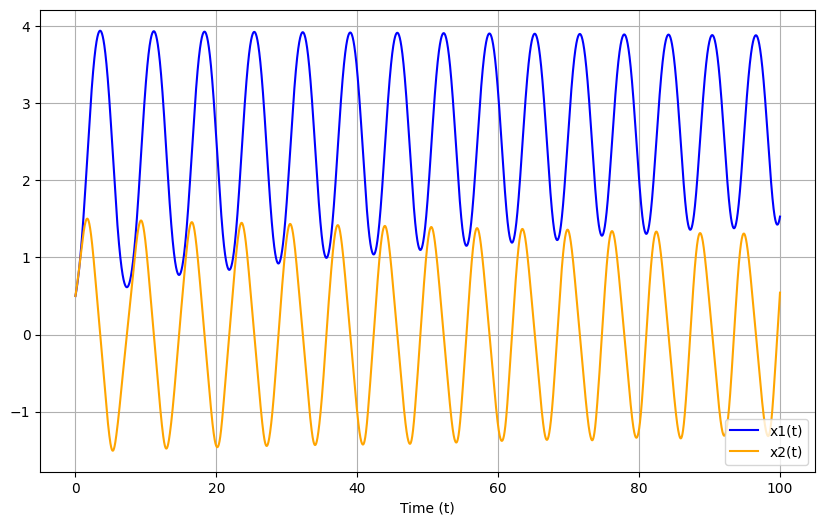

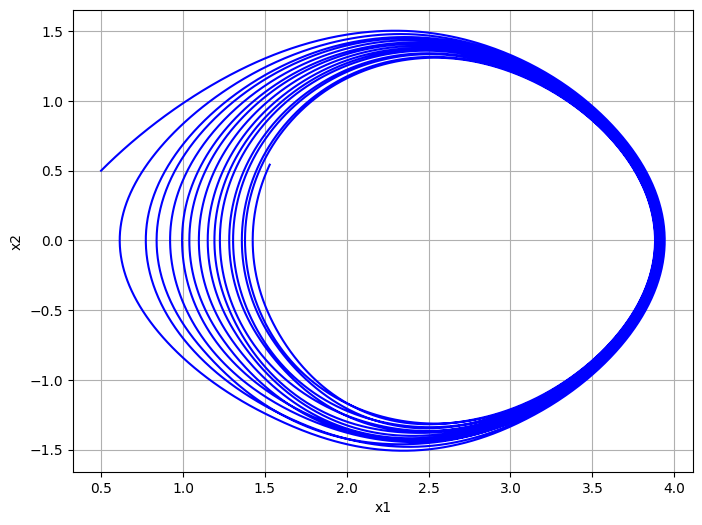

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(t_eval, x1, label="x1(t)", color="blue")
plt.plot(t_eval, x2, label="x2(t)", color="orange")
plt.xlabel("Time (t)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(x1, x2, color="blue")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

In [43]:
data = np.column_stack((x1[:-1], x2[:-1])) 
target = x1[1:] 

X_train, X_temp, y_train, y_temp = train_test_split(data, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [39]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [44]:
print("MSE:", mse)
print("R²:", r2)
print("Найкращі параметри:", best_params)

MSE: 2.69245541590099e-06
R²: 0.9999975252991316
Найкращі параметри: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


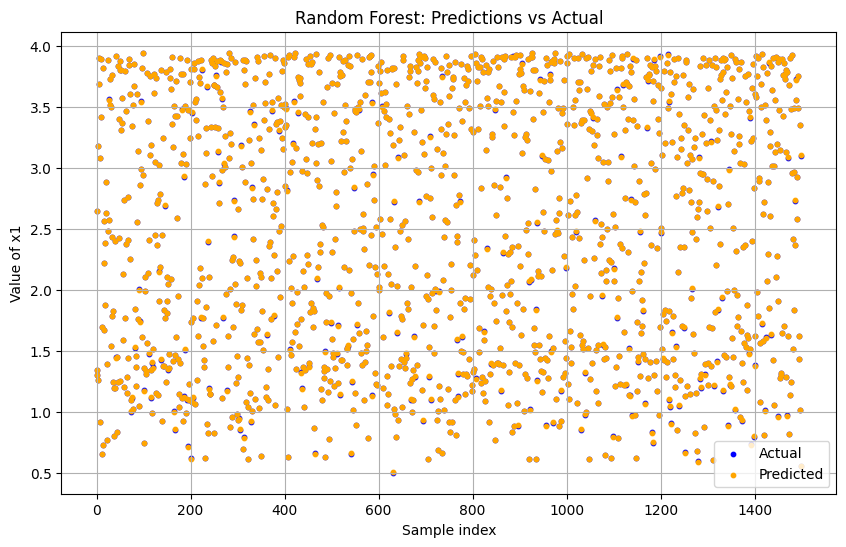

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", color="blue", s=10)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", color="orange", s=10)
plt.title("Random Forest: Predictions vs Actual")
plt.xlabel("Sample index")
plt.ylabel("Value of x1")
plt.legend()
plt.grid()
plt.show()


У ході роботи було змодельовано динаміку нелінійної системи Нарендра-Пархтізаратхі та використано модель Random Forest Regressor для передбачення наступних станів. Підбір параметрів за допомогою Grid Search дозволив досягти оптимальної точності, що підтверджується низьким значенням MSE та високим R². Візуалізація показала, що модель ефективно передбачає складну нелінійну поведінку системи.